# PRÁCTICA DE SIMULACIÓN - REGRESIÓN FIFA
### Alejandro Enríquez 
### Ingeniería en Ciencias de la Computación
### 10mo Ciclo

Objetivo: generar reportes con Matplotlib

In [1]:
# Imports y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.patches as ptch

data = pd.read_csv('fifa_datos.csv')
data


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [2]:
r1 = 125
r2 = 150
r3 = 175

data_fifa = pd.DataFrame()
data_fifa['id'] = data['ID']
data_fifa['nombre'] = data['Name']
data_fifa['edad'] = data['Age']
data_fifa['nacionalidad'] = data['Nationality']
data_fifa['peso'] = data['Weight']
data_fifa['estatura'] = data['Height']
data_fifa['potencial'] = data['Potential']
data_fifa['puntaje'] = data['Overall']

for i in range(len(data_fifa)):
    data_fifa['peso'][i] = str(data_fifa['peso'][i])
    data_fifa['peso'][i] = data_fifa['peso'][i][0:3]
    data_fifa['peso'][i] = float(data_fifa['peso'][i])    

data_fifa.dropna(subset = ["peso"], inplace=True)

<ipython-input-2-4b50b7148d60>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fifa['peso'][i] = str(data_fifa['peso'][i])
<ipython-input-2-4b50b7148d60>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fifa['peso'][i] = data_fifa['peso'][i][0:3]
<ipython-input-2-4b50b7148d60>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fifa['peso'][i] = float(data_fifa['peso'][i])


In [3]:
# Creación de los contadores necesarios
cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0

cont5 = 0
cont6 = 0
cont8 = 0
cont7 = 0
cont9 = 0
cont10 = 0
cont11 = 0

for i in data_fifa['peso']:
    if i < r1:
        cont1 = cont1+1
    elif i > r1 and i < r2:
        cont2 = cont2+1
    elif i > r2 and i < r3:
        cont3 = cont3+1
    elif i > r3:
        cont4 = cont4+1

for i in data_fifa['puntaje']:
    if i < 40:
        cont5 = cont5+1
    elif i < 50:
        cont6 = cont6+1
    elif i < 60:
        cont7 = cont7+1
    elif i < 70:
        cont8 = cont8+1
    elif i < 80:
        cont9 = cont9+1
    elif i < 90:
        cont10 = cont10+1
    elif i < 100:
        cont11 = cont11+1

<BarContainer object of 7 artists>

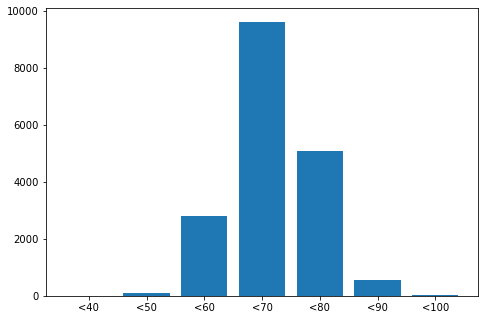

In [6]:
# Gráfico de barra
datos1 = [cont5, cont6, cont7, cont8, cont9, cont10, cont11]
labels1 = ["<40", "<50", "<60", "<70", "<80", "<90", "<100"]

fig = plot.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels1, datos1)

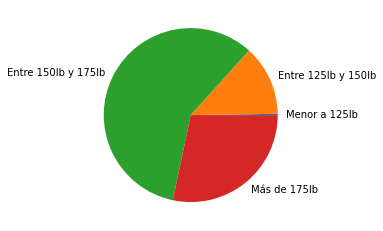

In [7]:
# Gráfico de pastel
datos = [cont1,cont2,cont3,cont4]
labels = ["Menor a 125lb", "Entre 125lb y 150lb", "Entre 150lb y 175lb", "Más de 175lb"]
plot.pie(datos, labels=labels)
plot.show()